# Klasifikasi ECOLI SMOTE

In [ ]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
conn = mysql.connector.connect(
  host='127.0.0.1',
  user='root',
  password='',
  database='ecoli'
)

df = pd.read_sql("SELECT * FROM ecoli", conn)
print("\nIsi tabel ecoli:")
print(df)


Isi tabel ecoli:
      id protein_name   mcg   gvh   lip  chg   aac  alm1  alm2  \
0      1    AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   
1      2   ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44   
2      3   ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46   
3      4   ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36   
4      5    ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35   
..   ...          ...   ...   ...   ...  ...   ...   ...   ...   
331  332   TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30   
332  333   UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32   
333  334   USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38   
334  335   XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37   
335  336   YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52   

    localization_class  
0                   cp  
1                   cp  
2                   cp  
3                   cp  
4                   cp  
..                 ...  
331           

C:\Users\Syafiq Azizi\AppData\Local\Temp\ipykernel_19688\2977041872.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM ecoli", conn)


Jumlah pada tiap kelas di kolom localization_class:
localization_class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64


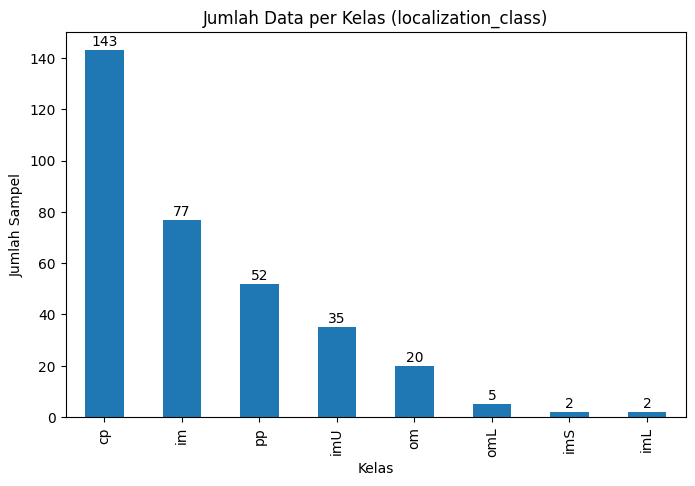

In [ ]:
species_counts = df['localization_class'].value_counts()

print("Jumlah pada tiap kelas di kolom localization_class:")
print(species_counts)

plt.figure(figsize=(8,5))
species_counts.plot(kind='bar')

plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.title("Jumlah Data per Kelas (localization_class)")

for i, v in enumerate(species_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
target_col = "localization_class"
X = df.drop(columns=[target_col])
y = df[target_col]

drop_cols = ["id", "protein_name"]
X = X.drop(columns=drop_cols, errors="ignore")


for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)

print("Label Encoding selesai")
print("Contoh X:\n", X.head())
print("Contoh y:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nJumlah data sebelum SMOTE:")
print(Counter(y_train))

os.environ["LOKY_MAX_CPU_COUNT"] = str(joblib.cpu_count())

class_counts = Counter(y_train)
minority_class = min(class_counts, key=class_counts.get)
n_minority_samples = class_counts[minority_class]
k_neighbors = max(1, min(5, n_minority_samples - 1))

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_res = pd.DataFrame(X_res, columns=X.columns)


print("\nJumlah data setelah SMOTE:")
print(Counter(y_train_res))


Label Encoding selesai
Contoh X:
     mcg   gvh   lip  chg   aac  alm1  alm2
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35
Contoh y: [0 1 2 3 4 5 6 7]

Jumlah data sebelum SMOTE:
Counter({0: 114, 1: 61, 7: 41, 4: 28, 5: 16, 6: 4, 3: 2, 2: 2})

Jumlah data setelah SMOTE:
Counter({1: 114, 0: 114, 4: 114, 7: 114, 5: 114, 3: 114, 6: 114, 2: 114})


In [ ]:
print("Fitur X:", X.shape[1])
print("Fitur X_res:", X_res.shape[1])


Fitur X: 7
Fitur X_res: 9


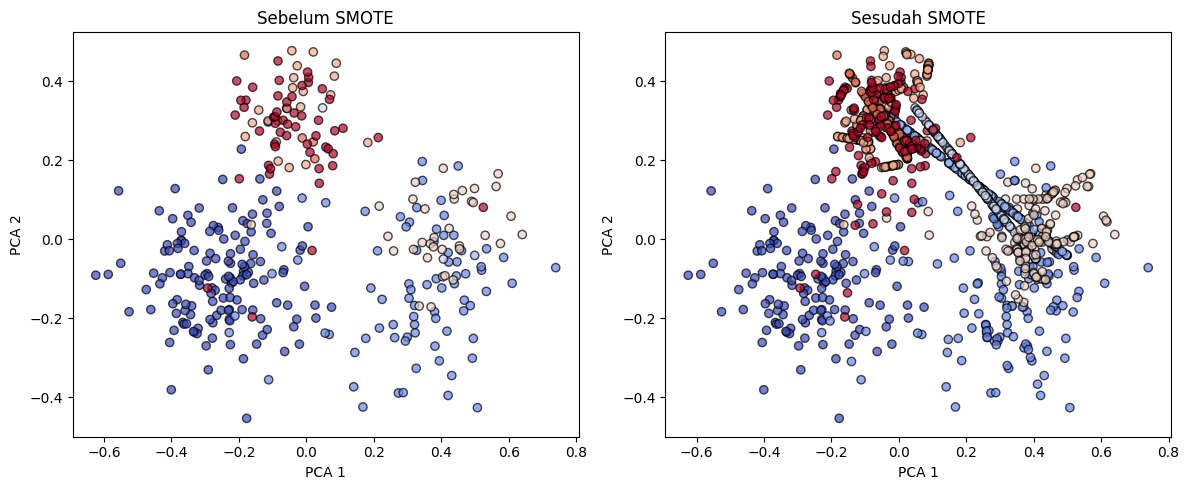

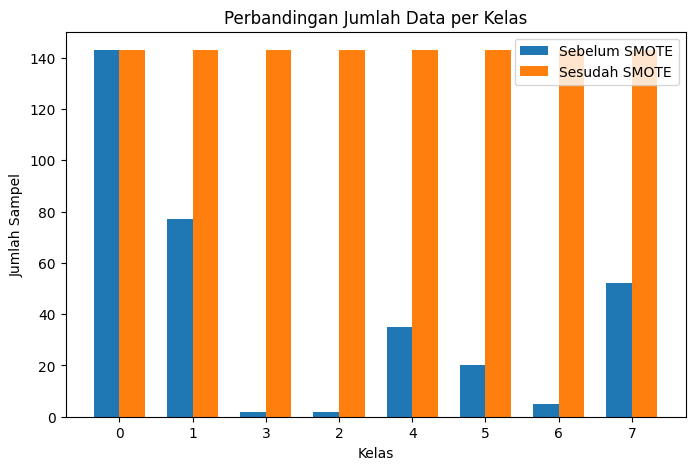

In [ ]:


pca = PCA(n_components=2)

X_pca = pca.fit_transform(X.values)

X_res_pca = pca.transform(X_res.values)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title("Sebelum SMOTE")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(1,2,2)
plt.scatter(X_res_pca[:,0], X_res_pca[:,1], c=y_res, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title("Sesudah SMOTE")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

counts_before = Counter(y)
counts_after = Counter(y_res)

labels = list(counts_after.keys())
before_vals = [counts_before.get(lbl, 0) for lbl in labels]
after_vals = [counts_after.get(lbl, 0) for lbl in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, before_vals, width, label='Sebelum SMOTE')
plt.bar(x + width/2, after_vals, width, label='Sesudah SMOTE')

plt.xticks(x, labels)
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.title("Perbandingan Jumlah Data per Kelas")
plt.legend()
plt.show()


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes:", accuracy_nb)


Naive Bayes: 0.7941176470588235


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest:", accuracy_rf)


Random Forest: 0.8676470588235294


In [ ]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)

y_pred_bag = bagging.predict(X_test)

accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Classifier:", accuracy_bag)

Bagging Classifier: 0.8382352941176471


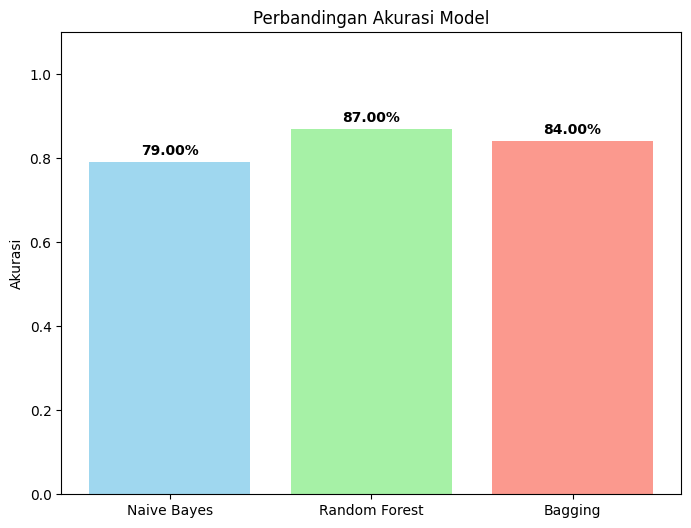

In [ ]:
akurasi = {
    "Naive Bayes": 0.79,
    "Random Forest": 0.87,
    "Bagging": 0.84
}

labels = list(akurasi.keys())
values = list(akurasi.values())

plt.figure(figsize=(8,6))
bars = plt.bar(labels, values, color=['skyblue','lightgreen','salmon'], alpha=0.8)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val*100:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model")
plt.show()
